In [1]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

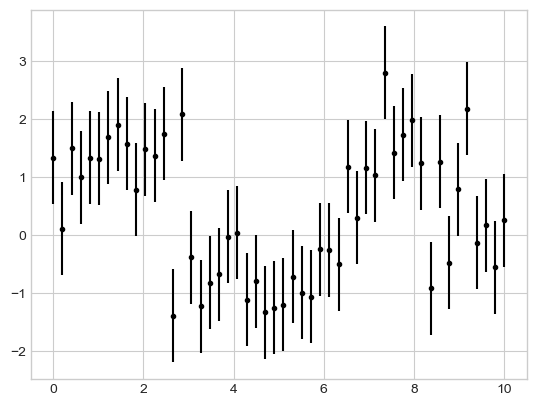

In [2]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='.k');

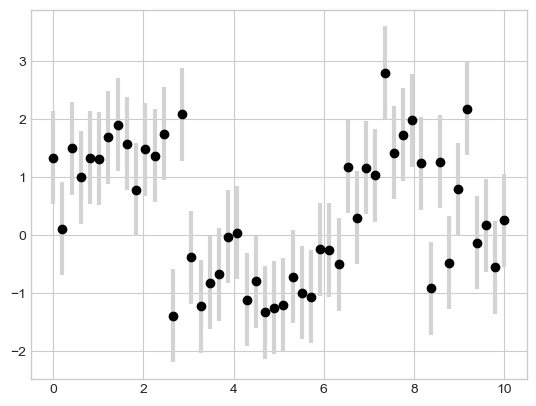

In [3]:
plt.errorbar(x, y, yerr=dy, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0);

In [5]:
from sklearn.gaussian_process import GaussianProcessRegressor

# 定义模型和一些符合模型的点
model = lambda x: x * np.sin(x)
xdata=np.array([1,3,5,6,8])
ydata=model(xdata)

# 计算高斯过程回归，使其符合 fit 数据点
gp=GaussianProcessRegressor()
gp.fit(xdata[:,np.newaxis],ydata)

xfit=np.linspace(0,10,1000)
yfit,std=gp.predict(xfit[:,np.newaxis],return_std=True)
dyfit=2*std # 两倍sigma ~ 95% 确定区域

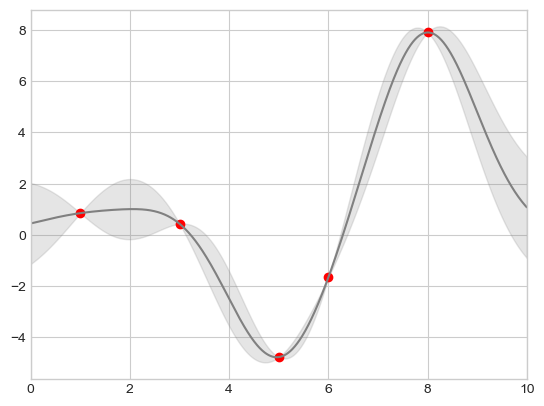

In [12]:
# 可视化结果
plt.plot(xdata,ydata,'or')
plt.plot(xfit,yfit,'-',color='gray')

plt.fill_between(xfit,yfit-dyfit,yfit+dyfit,
                 color='gray',alpha=0.2)
plt.xlim(0,10);
plt.savefig('errorbar.png')